# import libraries

In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import glob
import matplotlib.gridspec
import scipy.ndimage

import wrf
import netCDF4
import cmocean

import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy
import cartopy.io.shapereader

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# opening mean fields

## control data

In [3]:
!ls /beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/

001  001_with_xkzs  001_with_xkzs_and_fxpbls


In [5]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_with_xkzs_and_fxpbls'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [6]:
ptot_400 = wrf.getvar(ds_list, 'p', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ptot_400_sensitivity.npy', ptot_400)

geopot_400 = wrf.getvar(ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_geopot_400_sensitivity.npy', geopot_400)

tk_400 = wrf.getvar(ds_list, 'tk', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_tk_400_sensitivity.npy', tk_400)

ua_400 = wrf.getvar(ds_list, 'ua', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ua_400_sensitivity.npy', ua_400)

va_400 = wrf.getvar(ds_list, 'va', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_va_400_sensitivity.npy', va_400)

In [7]:
ptot_400 = numpy.load('DATA_ptot_400_sensitivity.npy')
geopot_400 = numpy.load('DATA_geopot_400_sensitivity.npy')
tk_400 = numpy.load('DATA_tk_400_sensitivity.npy')
ua_400 = numpy.load('DATA_ua_400_sensitivity.npy')
va_400 = numpy.load('DATA_va_400_sensitivity.npy')

In [8]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [9]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

In [10]:
qvapor_400 = cont_mfds['QVAPOR'].values
u_400 = cont_mfds['U'].values
v_400 = cont_mfds['V'].values
w_400 = cont_mfds['W'].values
t_400 = cont_mfds['T'].values

In [11]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']

In [12]:
rqvcuten_400 = cont_mfds['RQVCUTEN'].values
rucuten_400 = cont_mfds['RUCUTEN'].values
rvcuten_400 = cont_mfds['RVCUTEN'].values
rthcuten_400 = cont_mfds['RTHCUTEN'].values

rqvblten_400 = cont_mfds['RQVBLTEN'].values
rublten_400 = cont_mfds['RUBLTEN'].values
rvblten_400 = cont_mfds['RVBLTEN'].values
rthblten_400 = cont_mfds['RTHBLTEN'].values

In [13]:
xkzq3d_400 = cont_mfds['XKZQ3D'].values
xkzh3d_400 = cont_mfds['XKZH3D'].values
xkzm3d_400 = cont_mfds['XKZM3D'].values

In [14]:
hfxpbl2d_400 = cont_mfds['HFXPBL2D'].values
qfxpbl2d_400 = cont_mfds['QFXPBL2D'].values
ufxpbl2d_400 = cont_mfds['UFXPBL2D'].values
vfxpbl2d_400 = cont_mfds['VFXPBL2D'].values
bfxpbl2d_400 = cont_mfds['BFXPBL2D'].values
we2d_400 = cont_mfds['WE2D'].values

## phys data

In [24]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_with_xkzs_and_fxpbls'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [25]:
ptot_1000 = wrf.getvar(ds_list, 'p', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ptot_1000_sensitivity.npy', ptot_1000)

geopot_1000 = wrf.getvar(ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_geopot_1000_sensitivity.npy', geopot_1000)

tk_1000 = wrf.getvar(ds_list, 'tk', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_tk_1000_sensitivity.npy', tk_1000)

ua_1000 = wrf.getvar(ds_list, 'ua', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_ua_1000_sensitivity.npy', ua_1000)

va_1000 = wrf.getvar(ds_list, 'va', timeidx=wrf.ALL_TIMES).values
numpy.save('DATA_va_1000_sensitivity.npy', va_1000)

In [26]:
ptot_1000 = numpy.load('DATA_ptot_1000_sensitivity.npy')
geopot_1000 = numpy.load('DATA_geopot_1000_sensitivity.npy')
tk_1000 = numpy.load('DATA_tk_1000_sensitivity.npy')
ua_1000 = numpy.load('DATA_ua_1000_sensitivity.npy')
va_1000 = numpy.load('DATA_va_1000_sensitivity.npy')

In [27]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [28]:
qvapor_1000 = phys_mfds['QVAPOR'].values
u_1000 = phys_mfds['U'].values
v_1000 = phys_mfds['V'].values
w_1000 = phys_mfds['W'].values
t_1000 = phys_mfds['T'].values

In [29]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']

In [30]:
rqvcuten_1000 = phys_mfds['RQVCUTEN'].values
rucuten_1000 = phys_mfds['RUCUTEN'].values
rvcuten_1000 = phys_mfds['RVCUTEN'].values
rthcuten_1000 = phys_mfds['RTHCUTEN'].values

rqvblten_1000 = phys_mfds['RQVBLTEN'].values
rublten_1000 = phys_mfds['RUBLTEN'].values
rvblten_1000 = phys_mfds['RVBLTEN'].values
rthblten_1000 = phys_mfds['RTHBLTEN'].values

In [31]:
xkzq3d_1000 = phys_mfds['XKZQ3D'].values
xkzh3d_1000 = phys_mfds['XKZH3D'].values
xkzm3d_1000 = phys_mfds['XKZM3D'].values

In [32]:
hfxpbl2d_1000 = phys_mfds['HFXPBL2D'].values
qfxpbl2d_1000 = phys_mfds['QFXPBL2D'].values
ufxpbl2d_1000 = phys_mfds['UFXPBL2D'].values
vfxpbl2d_1000 = phys_mfds['VFXPBL2D'].values
bfxpbl2d_1000 = phys_mfds['BFXPBL2D'].values
we2d_1000 = phys_mfds['WE2D'].values

## define dx, dy

In [33]:
dx = 50000. # 50,000 m or 50 km
dy = 50000.

# constants

In [34]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

## get landmask

In [35]:
landmask = cont_mfds['LANDMASK'].sel(Time=0).values

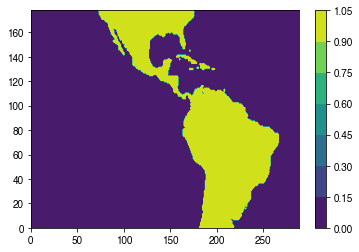

In [36]:
mp.contourf(landmask);mp.colorbar()

# calculate MSE

In [38]:
mse_400 = numpy.load('DATA_mse_400_sensitivity.npy')
mse_1000 = numpy.load('DATA_mse_1000_sensitivity.npy')

set up time/lev numbers

In [39]:
ntime = 25
nlev = 29

# calculate dtheta/dt for full, cu, and pbl schemes

In [40]:
dthetadt_400 = numpy.zeros(t_400.shape)*numpy.nan
dthetadt_1000 = numpy.zeros(t_1000.shape)*numpy.nan

In [41]:
for t in range(1,ntime-1):
    dthetadt_400[t,:,:,:] = (t_400[t+1,:,:,:]-t_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dthetadt_1000[t,:,:,:] = (t_1000[t+1,:,:,:]-t_1000[t-1,:,:,:])/7200.

# dqvapor/dt for full, cu, and pbl schemes

In [42]:
dqdt_400 = numpy.zeros(qvapor_400.shape)*numpy.nan
dqdt_1000 = numpy.zeros(qvapor_1000.shape)*numpy.nan

In [43]:
for t in range(1,ntime-1):
    dqdt_400[t,:,:,:] = (qvapor_400[t+1,:,:,:]-qvapor_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dqdt_1000[t,:,:,:] = (qvapor_1000[t+1,:,:,:]-qvapor_1000[t-1,:,:,:])/7200.

# duadt

In [44]:
duadt_400 = numpy.zeros(ua_400.shape)*numpy.nan
duadt_1000 = numpy.zeros(ua_1000.shape)*numpy.nan

In [45]:
for t in range(1,ntime-1):
    duadt_400[t,:,:,:] = (ua_400[t+1,:,:,:]-ua_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    duadt_1000[t,:,:,:] = (ua_1000[t+1,:,:,:]-ua_1000[t-1,:,:,:])/7200.

# dvadt

In [46]:
dvadt_400 = numpy.zeros(va_400.shape)*numpy.nan
dvadt_1000 = numpy.zeros(va_1000.shape)*numpy.nan

In [47]:
for t in range(1,ntime-1):
    dvadt_400[t,:,:,:] = (va_400[t+1,:,:,:]-va_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dvadt_1000[t,:,:,:] = (va_1000[t+1,:,:,:]-va_1000[t-1,:,:,:])/7200.

# dmse/dt

In [48]:
dmsedt_400 = numpy.zeros((ntime,nlev,xlat.shape[0],xlat.shape[1]))*numpy.nan
dmsedt_1000 = numpy.zeros((ntime,nlev,xlat.shape[0],xlat.shape[1]))*numpy.nan

In [49]:
for t in range(1,ntime-1):
    dmsedt_400[t,:,:,:] = (mse_400[t+1,:,:,:]-mse_400[t-1,:,:,:])/7200.
for t in range(1,ntime-1):
    dmsedt_1000[t,:,:,:] = (mse_1000[t+1,:,:,:]-mse_1000[t-1,:,:,:])/7200.

calculate lat lon stuff

In [50]:
dry_lon_lo, dry_lon_hi, dry_lat_lo, dry_lat_hi = -60,-50,-10,10
wet_lon_lo, wet_lon_hi, wet_lat_lo, wet_lat_hi = -80,-75,-10,10

dry_lon_lo_degE = 360+dry_lon_lo
dry_lon_hi_degE = 360+dry_lon_hi

wet_lon_lo_degE = 360+wet_lon_lo
wet_lon_hi_degE = 360+wet_lon_hi

In [51]:
lon_lo = dry_lon_lo
lon_hi = dry_lon_hi
lat_lo = dry_lat_lo
lat_hi = dry_lat_hi

# lon_lo = wet_lon_lo
# lon_hi = wet_lon_hi
# lat_lo = wet_lat_lo
# lat_hi = wet_lat_hi

In [52]:
landmask_indices = numpy.copy(landmask)
landmask_indices[landmask==1]=1
landmask_indices[landmask!=1]=0
landmask_indices = numpy.array(landmask_indices, dtype=bool)

In [53]:
lon_indices = (xlong>=lon_lo)&(xlong<=lon_hi)
lat_indices = (xlat>=lat_lo)&(xlat<=lat_hi)
latlon_indices = (lon_indices)&(lat_indices)&(landmask_indices)

# take latlon means

In [54]:
duadt_400_latlon_mean = numpy.nanmean(duadt_400[:,:,latlon_indices], axis=2)
duadt_1000_latlon_mean = numpy.nanmean(duadt_1000[:,:,latlon_indices], axis=2)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [55]:
dvadt_400_latlon_mean = numpy.nanmean(dvadt_400[:,:,latlon_indices], axis=2)
dvadt_1000_latlon_mean = numpy.nanmean(dvadt_1000[:,:,latlon_indices], axis=2)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [56]:
dthetadt_400_latlon_mean = numpy.nanmean(dthetadt_400[:,:,latlon_indices], axis=2)
dthetadt_1000_latlon_mean = numpy.nanmean(dthetadt_1000[:,:,latlon_indices], axis=2)

dqdt_400_latlon_mean = numpy.nanmean(dqdt_400[:,:,latlon_indices], axis=2)
dqdt_1000_latlon_mean = numpy.nanmean(dqdt_1000[:,:,latlon_indices], axis=2)

dmsedt_400_latlon_mean = numpy.nanmean(dmsedt_400[:,:,latlon_indices], axis=2)
dmsedt_1000_latlon_mean = numpy.nanmean(dmsedt_1000[:,:,latlon_indices], axis=2)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [57]:
rthcuten_400_latlon_mean = numpy.nanmean(rthcuten_400[:,:,latlon_indices], axis=2)
rthcuten_1000_latlon_mean = numpy.nanmean(rthcuten_1000[:,:,latlon_indices], axis=2)

rqvcuten_400_latlon_mean = numpy.nanmean(rqvcuten_400[:,:,latlon_indices], axis=2)
rqvcuten_1000_latlon_mean = numpy.nanmean(rqvcuten_1000[:,:,latlon_indices], axis=2)

In [58]:
rthblten_400_latlon_mean = numpy.nanmean(rthblten_400[:,:,latlon_indices], axis=2)
rthblten_1000_latlon_mean = numpy.nanmean(rthblten_1000[:,:,latlon_indices], axis=2)

rqvblten_400_latlon_mean = numpy.nanmean(rqvblten_400[:,:,latlon_indices], axis=2)
rqvblten_1000_latlon_mean = numpy.nanmean(rqvblten_1000[:,:,latlon_indices], axis=2)

In [59]:
rublten_400_latlon_mean = numpy.nanmean(rublten_400[:,:,latlon_indices], axis=2)
rublten_1000_latlon_mean = numpy.nanmean(rublten_1000[:,:,latlon_indices], axis=2)

rvblten_400_latlon_mean = numpy.nanmean(rvblten_400[:,:,latlon_indices], axis=2)
rvblten_1000_latlon_mean = numpy.nanmean(rvblten_1000[:,:,latlon_indices], axis=2)

In [60]:
rucuten_400_latlon_mean = numpy.nanmean(rucuten_400[:,:,latlon_indices], axis=2)
rucuten_1000_latlon_mean = numpy.nanmean(rucuten_1000[:,:,latlon_indices], axis=2)

rvcuten_400_latlon_mean = numpy.nanmean(rvcuten_400[:,:,latlon_indices], axis=2)
rvcuten_1000_latlon_mean = numpy.nanmean(rvcuten_1000[:,:,latlon_indices], axis=2)

adding in xkz terms

In [61]:
xkzq3d_400_latlon_mean = numpy.nanmean(xkzq3d_400[:,:,latlon_indices], axis=2)
xkzq3d_1000_latlon_mean = numpy.nanmean(xkzq3d_1000[:,:,latlon_indices], axis=2)

In [62]:
xkzh3d_400_latlon_mean = numpy.nanmean(xkzh3d_400[:,:,latlon_indices], axis=2)
xkzh3d_1000_latlon_mean = numpy.nanmean(xkzh3d_1000[:,:,latlon_indices], axis=2)

In [63]:
xkzm3d_400_latlon_mean = numpy.nanmean(xkzm3d_400[:,:,latlon_indices], axis=2)
xkzm3d_1000_latlon_mean = numpy.nanmean(xkzm3d_1000[:,:,latlon_indices], axis=2)

adding in fxpbl2d terms

In [65]:
hfxpbl2d_400_latlon_mean = numpy.nanmean(hfxpbl2d_400[:,latlon_indices], axis=1)
hfxpbl2d_1000_latlon_mean = numpy.nanmean(hfxpbl2d_1000[:,latlon_indices], axis=1)

In [67]:
qfxpbl2d_400_latlon_mean = numpy.nanmean(qfxpbl2d_400[:,latlon_indices], axis=1)
qfxpbl2d_1000_latlon_mean = numpy.nanmean(qfxpbl2d_1000[:,latlon_indices], axis=1)

In [68]:
ufxpbl2d_400_latlon_mean = numpy.nanmean(ufxpbl2d_400[:,latlon_indices], axis=1)
ufxpbl2d_1000_latlon_mean = numpy.nanmean(ufxpbl2d_1000[:,latlon_indices], axis=1)

In [69]:
vfxpbl2d_400_latlon_mean = numpy.nanmean(vfxpbl2d_400[:,latlon_indices], axis=1)
vfxpbl2d_1000_latlon_mean = numpy.nanmean(vfxpbl2d_1000[:,latlon_indices], axis=1)

In [70]:
bfxpbl2d_400_latlon_mean = numpy.nanmean(bfxpbl2d_400[:,latlon_indices], axis=1)
bfxpbl2d_1000_latlon_mean = numpy.nanmean(bfxpbl2d_1000[:,latlon_indices], axis=1)

In [71]:
we2d_400_latlon_mean = numpy.nanmean(we2d_400[:,latlon_indices], axis=1)
we2d_1000_latlon_mean = numpy.nanmean(we2d_1000[:,latlon_indices], axis=1)

# calculate diffs

In [72]:
dqdt_diffs_latlon_mean = dqdt_1000_latlon_mean-dqdt_400_latlon_mean
dthetadt_diffs_latlon_mean = dthetadt_1000_latlon_mean-dthetadt_400_latlon_mean
dmsedt_diffs_latlon_mean = dmsedt_1000_latlon_mean-dmsedt_400_latlon_mean
duadt_diffs_latlon_mean = duadt_1000_latlon_mean-duadt_400_latlon_mean

rthblten_diffs_latlon_mean = rthblten_1000_latlon_mean-rthblten_400_latlon_mean
rqvblten_diffs_latlon_mean = rqvblten_1000_latlon_mean-rqvblten_400_latlon_mean

rthcuten_diffs_latlon_mean = rthcuten_1000_latlon_mean-rthcuten_400_latlon_mean
rqvcuten_diffs_latlon_mean = rqvcuten_1000_latlon_mean-rqvcuten_400_latlon_mean

In [73]:
rucuten_diffs_latlon_mean = rucuten_1000_latlon_mean-rucuten_400_latlon_mean
rvcuten_diffs_latlon_mean = rvcuten_1000_latlon_mean-rvcuten_400_latlon_mean

In [74]:
rublten_diffs_latlon_mean = rublten_1000_latlon_mean-rublten_400_latlon_mean
rvblten_diffs_latlon_mean = rvblten_1000_latlon_mean-rvblten_400_latlon_mean

In [75]:
xkzq3d_diffs_latlon_mean = xkzq3d_1000_latlon_mean - xkzq3d_400_latlon_mean
xkzh3d_diffs_latlon_mean = xkzh3d_1000_latlon_mean - xkzh3d_400_latlon_mean
xkzm3d_diffs_latlon_mean = xkzm3d_1000_latlon_mean - xkzm3d_400_latlon_mean

In [80]:
bfxpbl2d_diffs_latlon_mean = bfxpbl2d_1000_latlon_mean - bfxpbl2d_400_latlon_mean
hfxpbl2d_diffs_latlon_mean = hfxpbl2d_1000_latlon_mean - hfxpbl2d_400_latlon_mean
qfxpbl2d_diffs_latlon_mean = qfxpbl2d_1000_latlon_mean - qfxpbl2d_400_latlon_mean
ufxpbl2d_diffs_latlon_mean = ufxpbl2d_1000_latlon_mean - ufxpbl2d_400_latlon_mean
vfxpbl2d_diffs_latlon_mean = vfxpbl2d_1000_latlon_mean - vfxpbl2d_400_latlon_mean
we2d_diffs_latlon_mean = we2d_1000_latlon_mean - we2d_400_latlon_mean

# plots for fxpbl2d stuff

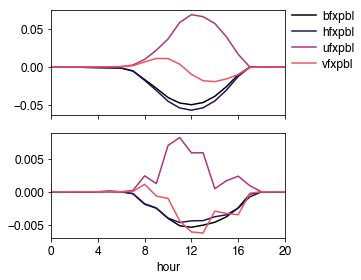

In [109]:
fig = mp.figure(figsize=(4.25,4))

fontsize=12

xvals = numpy.arange(ntime)
color_list = [matplotlib.cm.magma(i) for i in numpy.linspace(0.,0.8,6)]

ax1 = fig.add_subplot(211)
ax1.plot(xvals-4, bfxpbl2d_400_latlon_mean, label='bfxpbl', color=color_list[0])
ax1.plot(xvals-4, hfxpbl2d_400_latlon_mean, label='hfxpbl', color=color_list[1])
#ax1.plot(xvals-4, qfxpbl2d_400_latlon_mean, label='qfxpbl', color=color_list[2])
ax1.plot(xvals-4, ufxpbl2d_400_latlon_mean, label='ufxpbl', color=color_list[3])
ax1.plot(xvals-4, vfxpbl2d_400_latlon_mean, label='vfxpbl', color=color_list[4])
#ax1.plot(xvals-4, we2d_400_latlon_mean, label='w$_e$', color=color_list[5])
ax1.set_xlim(0,20)
ax1.set_xticks([i for i in range(0,21,4)])
ax1.set_xticklabels([])
ax1.tick_params(labelsize=fontsize)

ax2 = fig.add_subplot(212)
ax2.plot(xvals-4, bfxpbl2d_diffs_latlon_mean, label='bfxpbl', color=color_list[0])
ax2.plot(xvals-4, hfxpbl2d_diffs_latlon_mean, label='hfxpbl', color=color_list[1])
#ax2.plot(xvals-4, qfxpbl2d_diffs_latlon_mean, label='qfxpbl', color=color_list[2])
ax2.plot(xvals-4, ufxpbl2d_diffs_latlon_mean, label='ufxpbl', color=color_list[3])
ax2.plot(xvals-4, vfxpbl2d_diffs_latlon_mean, label='vfxpbl', color=color_list[4])
#ax2.plot(xvals-4, we2d_diffs_latlon_mean, label='w$_e$', color=color_list[5])
ax2.set_xlim(0,20)
ax2.tick_params(labelsize=fontsize)
ax2.set_xticks([i for i in range(0,21,4)])
ax2.set_xlabel('hour', fontsize=fontsize)

fig.tight_layout()

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, fontsize=fontsize, scatterpoints=1, \
          ncol=1, bbox_to_anchor=(1.03,1.0), bbox_transform=ax1.transAxes, \
          loc='upper left', borderaxespad=0, labelspacing=0.333, fancybox=False, \
          edgecolor='0', framealpha=0, borderpad=0., columnspacing=0.5, \
          handletextpad=0.5, markerscale=1)

fig.savefig('figures/entrainment_output.png', dpi=600, bbox_inches='tight', transparent=True)

# plots

In [69]:
ptot_400_latlon_time_mean = numpy.nanmean(ptot_400[:,:,latlon_indices], axis=(0,2))

In [70]:
xx, pp = numpy.meshgrid(numpy.arange(ntime), ptot_400_latlon_time_mean)

for dqdt

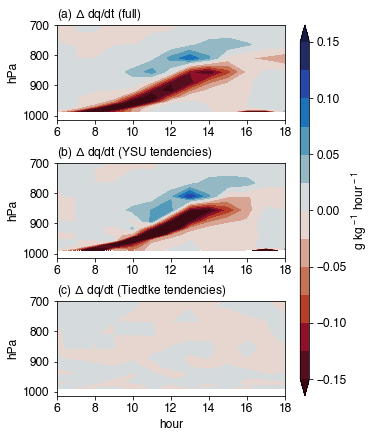

In [71]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.15,0.151,0.025)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dqdt_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rqvblten_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rqvcuten_diffs_latlon_mean.T*1000.*86400., \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) $\Delta$ dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dq/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
# cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
# cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
# cbar_ax1.tick_params(labelsize=fontsize)
# #cbar1.add_lines(contour_line1)
# cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar1.set_ticks([-.1,0,.1])

# ax2pos = ax2.get_position()
# cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
# cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
# cbar_ax2.tick_params(labelsize=fontsize)
# cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('g kg$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
#cbar3.set_ticks([-.01,0,.01])

fig.savefig('figures/sensitivity_analysis_dqdt_day1.png', dpi=600, bbox_inches='tight', transparent=True)

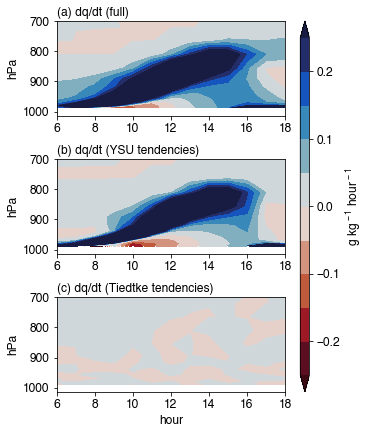

In [76]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.25,0.251,0.05)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dqdt_400_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rqvblten_400_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rqvcuten_400_latlon_mean.T*1000.*86400., \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) dq/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('g kg$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
#cbar3.set_ticks([-.01,0,.01])

fig.savefig('figures/sensitivity_analysis_dqdt_day1_background_control.png', dpi=600, bbox_inches='tight', transparent=True)

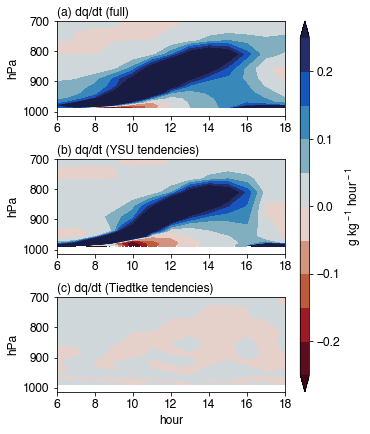

In [75]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.25,0.251,0.05)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dqdt_1000_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rqvblten_1000_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_1000_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rqvcuten_1000_latlon_mean.T*1000.*861000., \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_1000_dry_latlon_areamean.T/100., \
#                           dmsedt_1000_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) dq/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('g kg$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
#cbar3.set_ticks([-.01,0,.01])

fig.savefig('figures/sensitivity_analysis_dqdt_day1_background_phys.png', dpi=600, bbox_inches='tight', transparent=True)

# for xkz terms

background

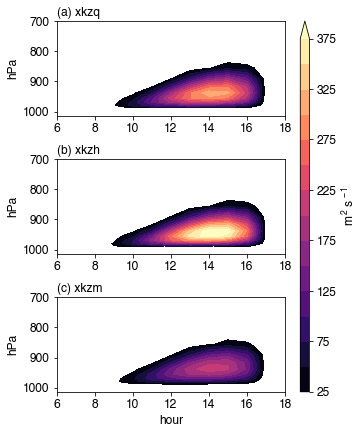

In [110]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(25, 376, 25)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             xkzq3d_400_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             xkzh3d_400_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             xkzm3d_400_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) xkzq', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) xkzh', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) xkzm', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
#K$_{\,q}$

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$ s$^{\,-1}$', fontsize=fontsize)

fig.savefig('figures/sensitivity_analysis_xkz_terms_background_control.png', dpi=600, bbox_inches='tight', transparent=True)

diffs

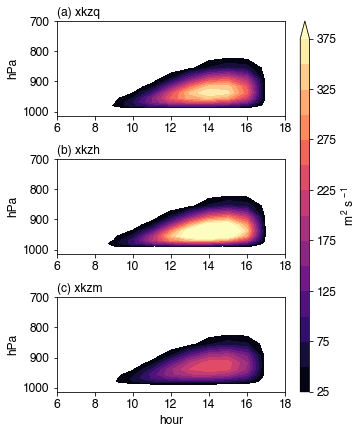

In [104]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(25,376,25)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             xkzq3d_1000_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             xkzh3d_1000_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             xkzm3d_1000_latlon_mean.T, \
                             cmap='magma', \
                             levels=levels, \
                             extend='max')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) K$_{\,q}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) K$_{\,h}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) K$_{\,m}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$ s$^{\,-1}$', fontsize=fontsize)

fig.savefig('figures/sensitivity_analysis_xkz_terms_background_phys.png', dpi=600, bbox_inches='tight', transparent=True)

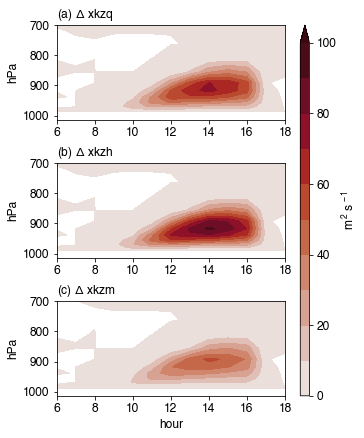

In [112]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(0,101,10)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             xkzq3d_diffs_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             xkzh3d_diffs_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             xkzm3d_diffs_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) $\Delta$ xkzq', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ xkzh', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ xkzm', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$ s$^{\,-1}$', fontsize=fontsize)

fig.savefig('figures/sensitivity_analysis_xkz_terms_diffs.png', dpi=600, bbox_inches='tight', transparent=True)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


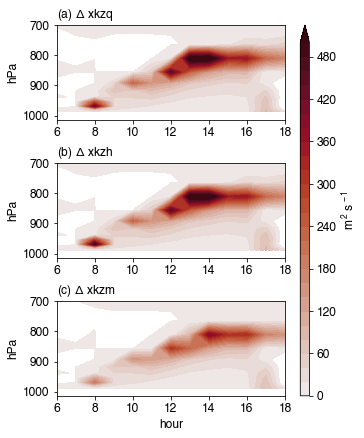

In [118]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(0,501.,20)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             (xkzq3d_diffs_latlon_mean.T/xkzq3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             (xkzh3d_diffs_latlon_mean.T/xkzh3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             (xkzm3d_diffs_latlon_mean.T/xkzm3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) $\Delta$ xkzq', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ xkzh', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ xkzm', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$ s$^{\,-1}$', fontsize=fontsize)

fig.savefig('figures/sensitivity_analysis_xkz_terms_diffs_percent.png', dpi=600, bbox_inches='tight')#, transparent=True)

just $K_m$ and $K_h$

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


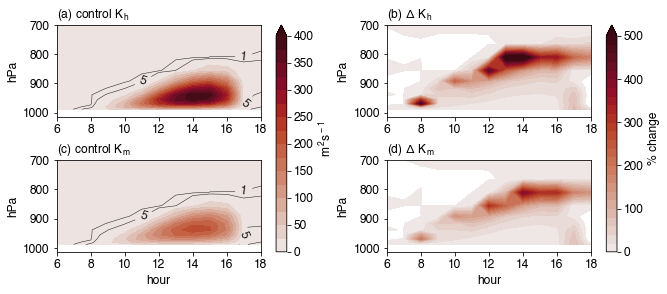

In [158]:
fontsize = 12

fig = mp.figure(figsize=(8.5,4))

levels = numpy.arange(0,401,25)
ax1 = fig.add_subplot(221)
ax1.tick_params(labelsize=fontsize)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             xkzh3d_400_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
contour_lines1 = ax1.contour(xx-4, pp/100., \
                             xkzh3d_400_latlon_mean.T, \
                             colors='0.1', linewidths=[0.5], \
                             levels=[1,5])
ax1.clabel(contour_lines1, inline=1, inline_spacing=1, fontsize=fontsize, fmt='%1.0f')
ax1.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax1.set_xlim(6,18)
ax1.set_ylabel('hPa', fontsize=fontsize)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])

ax3 = fig.add_subplot(223)
ax3.tick_params(labelsize=fontsize)
contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             xkzm3d_400_latlon_mean.T, \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
contour_lines3 = ax3.contour(xx-4, pp/100., \
                             xkzm3d_400_latlon_mean.T, \
                             colors='0.1', linewidths=[0.5], \
                             levels=[1,5])
ax3.clabel(contour_lines3, inline=1, inline_spacing=1, fontsize=fontsize, fmt='%1.0f')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) control K$_{\,h}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax3.text(s='(c) control K$_{\,m}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)



levels = numpy.arange(0,501,20)
ax2 = fig.add_subplot(222)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             (xkzh3d_diffs_latlon_mean.T/xkzh3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])

ax4 = fig.add_subplot(224)
ax4.tick_params(labelsize=fontsize)
contour_plot4 = ax4.contourf(xx-4, pp/100., \
                             (xkzm3d_diffs_latlon_mean.T/xkzm3d_400_latlon_mean.T)*100., \
                             cmap=cmocean.cm.amp, \
                             levels=levels, \
                             extend='max')
ax4.set_ylim(1013.25,700)
ax4.set_xlim(6,18)
ax4.set_xlabel('hour', fontsize=fontsize)
ax4.set_ylabel('hPa', fontsize=fontsize)
ax4.set_xticks([i for i in range(6,19,2)])
ax4.set_yticks([700,800,900,1000])
ax2.text(s='(b) $\Delta$ K$_{\,h}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax4.text(s='(d) $\Delta$ K$_{\,m}$', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)

fig.tight_layout(h_pad=2, w_pad=7)


ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.025, ax3pos.y0, 0.0175, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m$^{\,2}$s$^{\,-1}$', fontsize=fontsize)


ax2pos = ax2.get_position()
ax4pos = ax4.get_position()
cbar_ax4 = fig.add_axes([ax4pos.x1+0.025, ax4pos.y0, 0.0175, ax2pos.y1-ax4pos.y0])
cbar4 = fig.colorbar(contour_plot4, cax=cbar_ax4)
cbar_ax4.tick_params(labelsize=fontsize)
cbar4.set_label('% change', fontsize=fontsize)
cbar4.set_ticks([i for i in range(0,501,100)])

fig.savefig('figures/sensitivity_analysis_xkzm_xkzh_terms_background_and_percent_change.png', dpi=600, bbox_inches='tight', transparent=True)




u winds

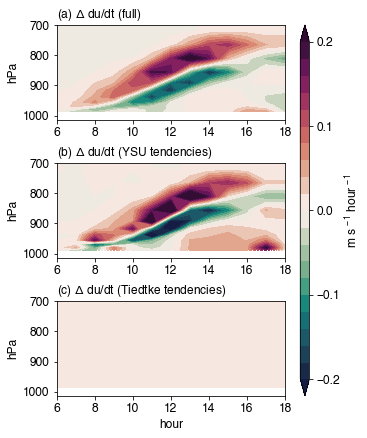

In [226]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.2,0.21,0.02)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             duadt_diffs_latlon_mean.T*3600., \
                             cmap=cmocean.cm.curl, \
                             levels=levels,\
                             extend='both')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rublten_diffs_latlon_mean.T*3600., \
                             cmap=cmocean.cm.curl, \
                             levels=levels,\
                             extend='both')
ax2.set_ylim(1013.25,700)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rucuten_diffs_latlon_mean.T*3600.*1e10, \
                             cmap=cmocean.cm.curl, \
                             levels=levels, \
                             extend='both')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s='(a) $\Delta$ du/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ du/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ du/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot1, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_label('m s$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.2,-.1,0,.1,.2])

fig.savefig('figures/sensitivity_analysis_duadt_day1.png', dpi=600, bbox_inches='tight', transparent=True)

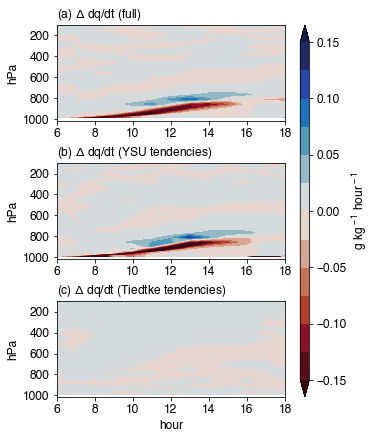

In [212]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.15,0.151,0.025)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dqdt_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,100)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([200,400,600,800,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rqvblten_diffs_latlon_mean.T*1000.*3600., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,100)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([200,400,600,800,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rqvcuten_diffs_latlon_mean.T*1000.*86400., \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,100)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([200,400,600,800,1000])
ax1.text(s='(a) $\Delta$ dq/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dq/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dq/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
# cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
# cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
# cbar_ax1.tick_params(labelsize=fontsize)
# #cbar1.add_lines(contour_line1)
# cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar1.set_ticks([-.1,0,.1])

# ax2pos = ax2.get_position()
# cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
# cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
# cbar_ax2.tick_params(labelsize=fontsize)
# cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('g kg$^{\,-1}$ hour$^{\,-1}$', fontsize=fontsize)
#cbar3.set_ticks([-.01,0,.01])

fig.savefig('figures/sensitivity_analysis_dqdt_day1_full_atmosphere.png', dpi=600, bbox_inches='tight', transparent=True)

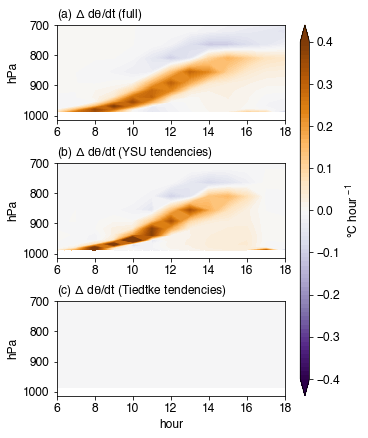

In [174]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.4,0.41,0.01)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dthetadt_diffs_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rthblten_diffs_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rthcuten_diffs_latlon_mean.T*86400., \
                             cmap='PuOr_r', levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s=r'(a) $\Delta$ d$\theta$/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s=r'(b) $\Delta$ d$\theta$/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s=r'(c) $\Delta$ d$\theta$/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
# cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
# cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
# cbar_ax1.tick_params(labelsize=fontsize)
# #cbar1.add_lines(contour_line1)
# cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar1.set_ticks([-.1,0,.1])

# ax2pos = ax2.get_position()
# cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
# cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
# cbar_ax2.tick_params(labelsize=fontsize)
# cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('$\degree$C hour$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.4,-.3,-.2,-.1,0,.1,.2,.3,.4])

fig.savefig('figures/sensitivity_analysis_dthetadt_day1.png', dpi=600, bbox_inches='tight', transparent=True)

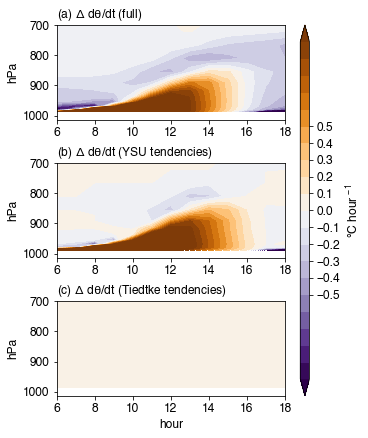

In [232]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-1,1.1,0.1)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dthetadt_400_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rthblten_400_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rthcuten_400_latlon_mean.T*86400., \
                             cmap='PuOr_r', levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                           dmsedt_400_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s=r'(a) $\Delta$ d$\theta$/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s=r'(b) $\Delta$ d$\theta$/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s=r'(c) $\Delta$ d$\theta$/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
# cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
# cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
# cbar_ax1.tick_params(labelsize=fontsize)
# #cbar1.add_lines(contour_line1)
# cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar1.set_ticks([-.1,0,.1])

# ax2pos = ax2.get_position()
# cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
# cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
# cbar_ax2.tick_params(labelsize=fontsize)
# cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('$\degree$C hour$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5])

fig.savefig('figures/sensitivity_analysis_dthetadt_background_day1.png', dpi=600, bbox_inches='tight', transparent=True)

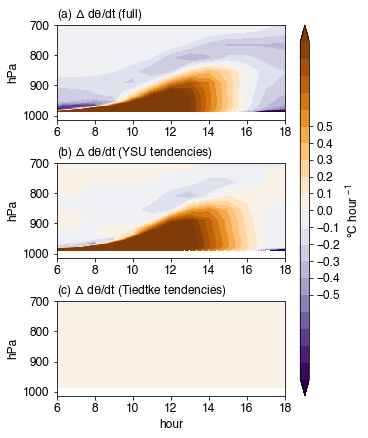

In [231]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-1,1.1,0.1)
contour_plot1 = ax1.contourf(xx-4, pp/100., \
                             dthetadt_1000_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line1 = ax1.contour(xx_dmsedt-4, ptot_1000_dry_latlon_areamean.T/100., \
#                           dmsedt_1000_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1013.25,700)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_yticks([700,800,900,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)

contour_plot2 = ax2.contourf(xx-4, pp/100., \
                             rthblten_1000_latlon_mean.T*3600., \
                             cmap='PuOr_r', extend='both', levels=levels)
# contour_line2 = ax2.contour(xx-4, pp/100., \
#                           dmsedt_1000_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1013.25,700)
#ax.set_xlim(0,240)
ax2.set_xlim(6,18)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.set_yticks([700,800,900,1000])


ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

contour_plot3 = ax3.contourf(xx-4, pp/100., \
                             rthcuten_1000_latlon_mean.T*861000., \
                             cmap='PuOr_r', levels=levels, extend='both')
# contour_line3 = ax3.contour(xx_dmsedt-4, ptot_1000_dry_latlon_areamean.T/100., \
#                           dmsedt_1000_dry_latlon_areamean.T, \
#                           levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(1013.25,700)
ax3.set_xlim(6,18)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.set_yticks([700,800,900,1000])
ax1.text(s=r'(a) $\Delta$ d$\theta$/dt (full)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s=r'(b) $\Delta$ d$\theta$/dt (YSU tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s=r'(c) $\Delta$ d$\theta$/dt (Tiedtke tendencies)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
# cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
# cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
# cbar_ax1.tick_params(labelsize=fontsize)
# #cbar1.add_lines(contour_line1)
# cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar1.set_ticks([-.1,0,.1])

# ax2pos = ax2.get_position()
# cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
# cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
# cbar_ax2.tick_params(labelsize=fontsize)
# cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
# #cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax1pos.y1-ax3pos.y0])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
#cbar3.add_lines(contour_line3)
cbar3.set_label('$\degree$C hour$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5])

fig.savefig('figures/sensitivity_analysis_dthetadt_background_phys_day1.png', dpi=600, bbox_inches='tight', transparent=True)

# dmsedt time series

In [95]:
ptot_400_dry_latlon = ptot_400_midpoints[:,:,dry_latlon_subset_midpoints]

dmsedt_400_dry_latlon = dmsedt_400[:,:,dry_latlon_subset_midpoints]
dmsedt_1000_dry_latlon = dmsedt_1000[:,:,dry_latlon_subset_midpoints]
dmsedt_diff_dry_latlon = dmsedt_1000_dry_latlon-dmsedt_400_dry_latlon

dmsedt_400_dry_latlon_areamean = numpy.nanmean(dmsedt_400_dry_latlon, axis=2)
dmsedt_diff_dry_latlon_areamean = numpy.nanmean(dmsedt_diff_dry_latlon, axis=2)
ptot_400_dry_latlon_areamean = numpy.nanmean(ptot_400_dry_latlon, axis=2)

In [186]:
convergence_400_dry_latlon = convergence_400[:,:,dry_latlon_subset_midpoints]
convergence_1000_dry_latlon = convergence_1000[:,:,dry_latlon_subset_midpoints]

advection_400_dry_latlon = advection_400[:,:,dry_latlon_subset_midpoints]
advection_1000_dry_latlon = advection_1000[:,:,dry_latlon_subset_midpoints]

advection_diff_dry_latlon = advection_1000_dry_latlon-advection_400_dry_latlon
convergence_diff_dry_latlon = convergence_1000_dry_latlon-convergence_400_dry_latlon

advection_400_dry_latlon_areamean = numpy.nanmean(advection_400_dry_latlon, axis=2)
convergence_400_dry_latlon_areamean = numpy.nanmean(convergence_400_dry_latlon, axis=2)
advection_diff_dry_latlon_areamean = numpy.nanmean(advection_diff_dry_latlon, axis=2)
convergence_diff_dry_latlon_areamean = numpy.nanmean(convergence_diff_dry_latlon, axis=2)

In [108]:
xx_dmsedt, pp_dmsedt = numpy.meshgrid(numpy.arange(241), ptot_400_dry_latlon_areamean[0,:])

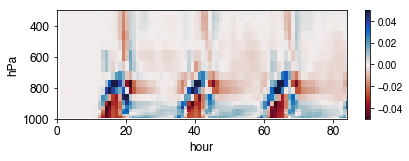

In [129]:
fontsize = 12

fig = mp.figure(figsize=(6.5,2))

ax = fig.add_subplot(111)
ax.tick_params(labelsize=fontsize)
contour_plot = ax.pcolormesh(xx_dmsedt, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, vmin=-.05, vmax=.05)

ax.set_ylim(1000,300)
#ax.set_xlim(0,240)
ax.set_xlim(0,84)

ax.set_xlabel('hour', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)

fig.colorbar(contour_plot)

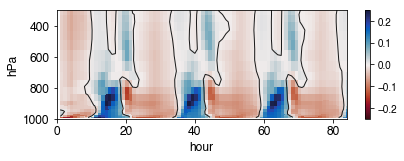

In [130]:
fontsize = 12

fig = mp.figure(figsize=(6.5,2))

ax = fig.add_subplot(111)
ax.tick_params(labelsize=fontsize)
contour_plot = ax.pcolormesh(xx_dmsedt, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_400_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, vmin=-.25, vmax=.25)

contour_line = ax.contour(xx_dmsedt, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax.set_ylim(1000,300)
ax.set_xlim(0,84)

ax.set_xlabel('hour', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)

fig.colorbar(contour_plot)



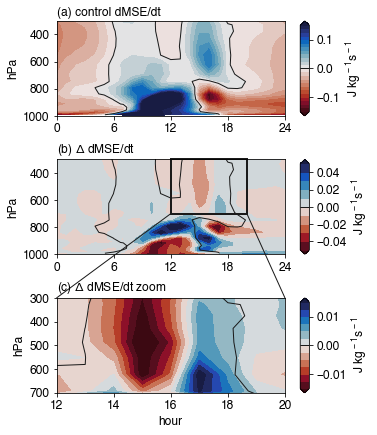

In [177]:
fontsize = 12

fig = mp.figure(figsize=(4.25,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
# contour_plot1 = ax1.pcolormesh(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                              dmsedt_400_dry_latlon_areamean.T, \
#                              cmap=cmocean.cm.balance_r, vmin=-.2, vmax=.2)

levels = numpy.arange(-.15,.151,0.0125)
contour_plot1 = ax1.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_400_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1000,300)
ax1.set_xlim(0,24)
ax1.set_xticks([i for i in range(0,25,6)])
ax1.set_yticks([400,600,800,1000])
#ax1.set_xlabel('hour', fontsize=fontsize)
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)
# contour_plot2 = ax2.pcolormesh(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                              dmsedt_diff_dry_latlon_areamean.T, \
#                              cmap=cmocean.cm.balance_r, vmin=-.05, vmax=.05)

levels = numpy.arange(-0.05,0.051,0.01)

contour_plot2 = ax2.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

contour_line2 = ax2.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1000,300)
#ax.set_xlim(0,240)
ax2.set_xlim(0,24)
#ax2.set_xlabel('hour', fontsize=fontsize)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(0,25,6)])
ax2.set_yticks([400,600,800,1000])

ax2.add_patch(matplotlib.patches.Rectangle((12,700),8,-400, \
                                           fill=False, \
                                           edgecolor='0.1', lw=2, clip_on=False))



ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)

levels = numpy.arange(-0.015,0.0151,0.0025)
contour_plot3 = ax3.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(700,300)
#ax.set_xlim(0,240)
ax3.set_xlim(12,20)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(12,21,2)])
ax3.set_yticks([300,400,500,600,700])

ax1.text(s='(a) control dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dMSE/dt zoom', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
cbar_ax1 = fig.add_axes([ax1pos.x1+0.05, ax1pos.y0, 0.03, ax1pos.height])
cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.add_lines(contour_line1)
cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar1.set_ticks([-.1,0,.1])

ax2pos = ax2.get_position()
cbar_ax2 = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.03, ax2pos.height])
cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.05, ax3pos.y0, 0.03, ax3pos.height])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.add_lines(contour_line3)
cbar3.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.01,0,.01])

conpatch = matplotlib.patches.ConnectionPatch(xyA=(12,300), \
                                              xyB=(12,700), \
                                              coordsA='data', \
                                              coordsB='data', \
                                              axesA=ax3, \
                                              axesB=ax2, \
                                              color='0.1')
ax3.add_artist(conpatch)

conpatch = matplotlib.patches.ConnectionPatch(xyA=(20,300), \
                                              xyB=(20,700), \
                                              coordsA='data', \
                                              coordsB='data', \
                                              axesA=ax3, \
                                              axesB=ax2, \
                                              color='0.1')

ax3.add_artist(conpatch)

fig.savefig('manuscript_fig9_dmsedt_profile_first_1days.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
#mean_dmsedt_24h = 

ptot_400_dry_latlon_areamean.shape

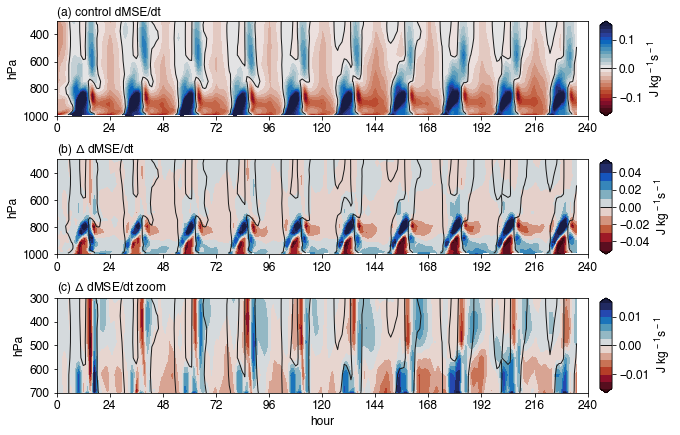

In [197]:
fontsize = 12

fig = mp.figure(figsize=(8.5,6))


ax1 = fig.add_subplot(311)
ax1.tick_params(labelsize=fontsize)
# contour_plot1 = ax1.pcolormesh(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                              dmsedt_400_dry_latlon_areamean.T, \
#                              cmap=cmocean.cm.balance_r, vmin=-.2, vmax=.2)

levels = numpy.arange(-.15,.151,0.0125)
contour_plot1 = ax1.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_400_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1000,300)
ax1.set_xlim(0,240)
ax1.set_xticks([i for i in range(0,241,24)])
ax1.set_yticks([400,600,800,1000])
#ax1.set_xlabel('hour', fontsize=fontsize)
ax1.set_ylabel('hPa', fontsize=fontsize)



ax2 = fig.add_subplot(312)
ax2.tick_params(labelsize=fontsize)
# contour_plot2 = ax2.pcolormesh(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                              dmsedt_diff_dry_latlon_areamean.T, \
#                              cmap=cmocean.cm.balance_r, vmin=-.05, vmax=.05)

levels = numpy.arange(-0.05,0.051,0.01)

contour_plot2 = ax2.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

contour_line2 = ax2.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1000,300)
#ax.set_xlim(0,240)
ax2.set_xlim(0,240)
#ax2.set_xlabel('hour', fontsize=fontsize)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(0,241,24)])
ax2.set_yticks([400,600,800,1000])

# ax2.add_patch(matplotlib.patches.Rectangle((12,600),8,-300, \
#                                            fill=False, \
#                                            edgecolor='0.1', lw=2, clip_on=False))



ax3 = fig.add_subplot(313)
ax3.tick_params(labelsize=fontsize)
# contour_plot3 = ax3.pcolormesh(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
#                              dmsedt_diff_dry_latlon_areamean.T, \
#                              cmap=cmocean.cm.balance_r, vmin=-.05, vmax=.05)

levels = numpy.arange(-0.015,0.0151,0.0025)

contour_plot3 = ax3.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')

contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(700,300)
#ax.set_xlim(0,240)
ax3.set_xlim(0,240)
ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(0,241,24)])
ax3.set_yticks([300,400,500,600,700])


ax1.text(s='(a) control dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dMSE/dt zoom', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
cbar_ax1 = fig.add_axes([ax1pos.x1+0.02, ax1pos.y0, 0.02, ax1pos.height])
cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.add_lines(contour_line1)
cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar1.set_ticks([-.1,0,.1])

ax2pos = ax2.get_position()
cbar_ax2 = fig.add_axes([ax2pos.x1+0.02, ax2pos.y0, 0.02, ax2pos.height])
cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.02, ax3pos.y0, 0.02, ax3pos.height])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.add_lines(contour_line3)
cbar3.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.01,0,.01])

# conpatch = matplotlib.patches.ConnectionPatch(xyA=(0,300), \
#                                               xyB=(0,600), \
#                                               coordsA='data', \
#                                               coordsB='data', \
#                                               axesA=ax3, \
#                                               axesB=ax2, \
#                                               color='0.1')
# ax3.add_artist(conpatch)

# conpatch = matplotlib.patches.ConnectionPatch(xyA=(120,300), \
#                                               xyB=(120,600), \
#                                               coordsA='data', \
#                                               coordsB='data', \
#                                               axesA=ax3, \
#                                               axesB=ax2, \
#                                               color='0.1')

# ax3.add_artist(conpatch)

fig.savefig('dmsedt_profile_first_10days.png', dpi=600, bbox_inches='tight', transparent=True)

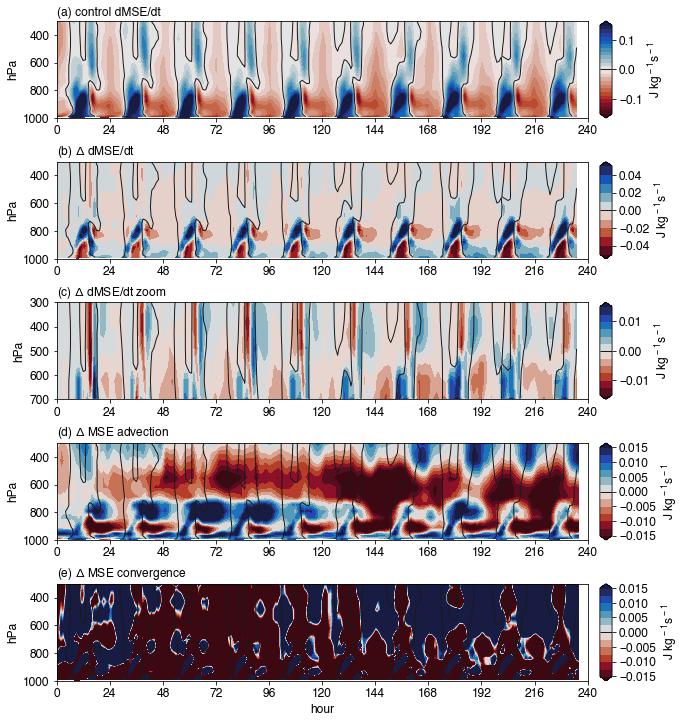

In [198]:
fontsize = 12

fig = mp.figure(figsize=(8.5,10))

##################################################
ax1 = fig.add_subplot(511)
ax1.tick_params(labelsize=fontsize)
levels = numpy.arange(-.15,.151,0.0125)
contour_plot1 = ax1.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_400_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
contour_line1 = ax1.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                            dmsedt_400_dry_latlon_areamean.T, \
                            levels=[0], linewidths=[1], colors='0.1')
ax1.set_ylim(1000,300)
ax1.set_xlim(0,240)
ax1.set_xticks([i for i in range(0,241,24)])
ax1.set_yticks([400,600,800,1000])
ax1.set_ylabel('hPa', fontsize=fontsize)


##################################################
ax2 = fig.add_subplot(512)
ax2.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.05,0.051,0.01)
contour_plot2 = ax2.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
contour_line2 = ax2.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax2.set_ylim(1000,300)
ax2.set_xlim(0,240)
ax2.set_ylabel('hPa', fontsize=fontsize)
ax2.set_xticks([i for i in range(0,241,24)])
ax2.set_yticks([400,600,800,1000])


##################################################
ax3 = fig.add_subplot(513)
ax3.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.015,0.0151,0.0025)
contour_plot3 = ax3.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             dmsedt_diff_dry_latlon_areamean.T, \
                             cmap=cmocean.cm.balance_r, levels=levels, extend='both')
contour_line3 = ax3.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax3.set_ylim(700,300)
ax3.set_xlim(0,240)
#ax3.set_xlabel('hour', fontsize=fontsize)
ax3.set_ylabel('hPa', fontsize=fontsize)
ax3.set_xticks([i for i in range(0,241,24)])
ax3.set_yticks([300,400,500,600,700])


##################################################
ax4 = fig.add_subplot(514)
ax4.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.015,0.0151,0.0025)
contour_plot4 = ax4.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             advection_400_dry_latlon_areamean.T, \
                             levels=levels, \
                             cmap=cmocean.cm.balance_r, extend='both')
contour_line4 = ax4.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax4.set_ylim(1000,300)
ax4.set_xlim(0,240)
#ax4.set_xlabel('hour', fontsize=fontsize)
ax4.set_ylabel('hPa', fontsize=fontsize)
ax4.set_xticks([i for i in range(0,241,24)])
ax4.set_yticks([400,600,800,1000])


##################################################
ax5 = fig.add_subplot(515)
ax5.tick_params(labelsize=fontsize)
levels = numpy.arange(-0.015,0.0151,0.0025)
contour_plot5 = ax5.contourf(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                             convergence_400_dry_latlon_areamean.T, \
                             levels=levels, \
                             cmap=cmocean.cm.balance_r, extend='both')
contour_line5 = ax5.contour(xx_dmsedt-4, ptot_400_dry_latlon_areamean.T/100., \
                          dmsedt_400_dry_latlon_areamean.T, \
                          levels=[0], linewidths=[1], colors='0.1')
ax5.set_ylim(1000,300)
ax5.set_xlim(0,240)
ax5.set_xlabel('hour', fontsize=fontsize)
ax5.set_ylabel('hPa', fontsize=fontsize)
ax5.set_xticks([i for i in range(0,241,24)])
ax5.set_yticks([400,600,800,1000])







ax1.text(s='(a) control dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ dMSE/dt', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ dMSE/dt zoom', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
ax4.text(s='(d) $\Delta$ MSE advection', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
ax5.text(s='(e) $\Delta$ MSE convergence', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)


fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
cbar_ax1 = fig.add_axes([ax1pos.x1+0.02, ax1pos.y0, 0.02, ax1pos.height])
cbar1 = fig.colorbar(contour_plot1, cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.add_lines(contour_line1)
cbar1.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar1.set_ticks([-.1,0,.1])

ax2pos = ax2.get_position()
cbar_ax2 = fig.add_axes([ax2pos.x1+0.02, ax2pos.y0, 0.02, ax2pos.height])
cbar2 = fig.colorbar(contour_plot2, cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar2.add_lines(contour_line2)

ax3pos = ax3.get_position()
cbar_ax3 = fig.add_axes([ax3pos.x1+0.02, ax3pos.y0, 0.02, ax3pos.height])
cbar3 = fig.colorbar(contour_plot3, cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.add_lines(contour_line3)
cbar3.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
cbar3.set_ticks([-.01,0,.01])

ax4pos = ax4.get_position()
cbar_ax4 = fig.add_axes([ax4pos.x1+0.02, ax4pos.y0, 0.02, ax4pos.height])
cbar4 = fig.colorbar(contour_plot4, cax=cbar_ax4)
cbar_ax4.tick_params(labelsize=fontsize)
cbar4.add_lines(contour_line4)
cbar4.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
#cbar4.set_ticks([-.01,0,.01])

ax5pos = ax5.get_position()
cbar_ax5 = fig.add_axes([ax5pos.x1+0.02, ax5pos.y0, 0.02, ax5pos.height])
cbar5 = fig.colorbar(contour_plot5, cax=cbar_ax5)
cbar_ax5.tick_params(labelsize=fontsize)
cbar5.add_lines(contour_line5)
cbar5.set_label('J kg$^{\,-1}$s$^{\,-1}$', fontsize=fontsize)
#cbar5.set_ticks([-.01,0,.01])

fig.savefig('dmsedt_profile_first_10days_with_advection_convergence_terms.png', dpi=600, bbox_inches='tight', transparent=True)

# plot climatological moisture advection/convergence

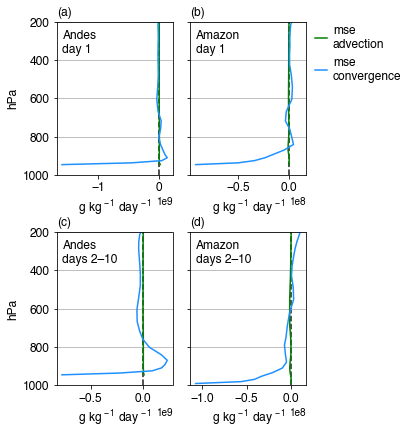

In [178]:
fontsize=12

fig = mp.figure(figsize=(4.5,6))

ax_list = []

#####
ax = fig.add_subplot(221)

ax.plot(advection_400_wet_region_day1*1000.*86400.,ptot_400_wet_region_midpoints/100., c='green', label='moist. adv.')
ax.plot(convergence_400_wet_region_day1*1000.*86400.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moist. conv.')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-10,10)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(a)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(222)

ax.plot(advection_400_dry_region_day1*1000.*86400.,ptot_400_wet_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(convergence_400_dry_region_day1*1000.*86400.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='mse\nconvergence')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-5,5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax_list.append(ax)
ax.text(s='Amazon\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(b)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()

#####
ax = fig.add_subplot(223)

ax.plot(advection_400_wet_region*1000.*86400.,ptot_400_wet_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(convergence_400_wet_region*1000.*86400.,ptot_400_wet_region_midpoints/100.,c='dodgerblue', label='mse\nconvergence')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-10,10)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(c)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(224)

ax.plot(advection_400_dry_region*1000.*86400.,ptot_400_dry_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(convergence_400_dry_region*1000.*86400.,ptot_400_dry_region_midpoints/100.,c='dodgerblue', label='mse\nconvergence')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-5,5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax.text(s='Amazon\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(d)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

fig.tight_layout(h_pad=1)

handles, labels = ax_list[1].get_legend_handles_labels()
legend = ax_list[1].legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(1.05,1), edgecolor='None', \
                   facecolor='None', fancybox=False, bbox_transform=ax_list[1].transAxes, loc='upper left', \
                   borderaxespad=0., borderpad=0.25, handlelength=1.0, handletextpad=0.5, \
                   columnspacing=0.5, markerscale=1)

fig.savefig('manuscript_figXX_climatological_mse_budget_TOTAL_10d_and_day1.png', dpi=600, \
            transparent=True, bbox_inches='tight')


# plot individual conv, div, dmsedt terms

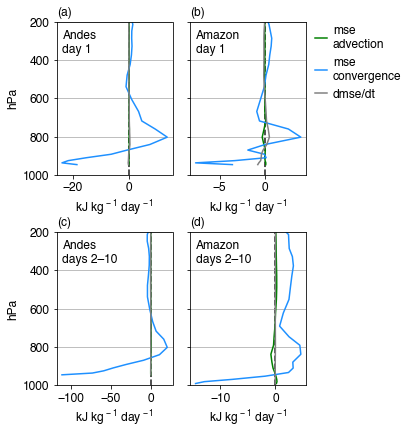

In [85]:
fontsize=12

fig = mp.figure(figsize=(4.5,6))

ax_list = []

#####
ax = fig.add_subplot(221)

ax.plot(diff_wet_region_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moist. adv.')
ax.plot(diff_wet_region_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moist. conv.')
ax.plot(diff_wet_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dmse/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(a)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(222)

ax.plot(diff_dry_region_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(diff_dry_region_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='mse\nconvergence')
ax.plot(diff_dry_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dmse/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax_list.append(ax)
ax.text(s='Amazon\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(b)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()

#####
ax = fig.add_subplot(223)

ax.plot(diff_wet_region_adv*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(diff_wet_region_conv*86400./1000.,ptot_400_wet_region_midpoints/100.,c='dodgerblue', label='mse\nconvergence')
ax.plot(diff_wet_region_dmsedt*86400./1000.,ptot_400_wet_region_midpoints/100.,c='0.5', label='dmse/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(c)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(224)

ax.plot(diff_dry_region_adv*86400./1000.,ptot_400_dry_region_midpoints/100., c='green', label='mse\nadvection')
ax.plot(diff_dry_region_conv*86400./1000.,ptot_400_dry_region_midpoints/100.,c='dodgerblue', label='mse\nconvergence')
ax.plot(diff_dry_region_dmsedt*86400./1000.,ptot_400_dry_region_midpoints/100.,c='0.5',label='dmse/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax.text(s='Amazon\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(d)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

fig.tight_layout(h_pad=1)

handles, labels = ax_list[1].get_legend_handles_labels()
legend = ax_list[1].legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(1.05,1), edgecolor='None', \
                   facecolor='None', fancybox=False, bbox_transform=ax_list[1].transAxes, loc='upper left', \
                   borderaxespad=0., borderpad=0.25, handlelength=1.0, handletextpad=0.5, \
                   columnspacing=0.5, markerscale=1)

fig.savefig('manuscript_figXX_mean_mse_budget_TOTAL_10d_and_day1.png', dpi=600, \
            transparent=True, bbox_inches='tight')

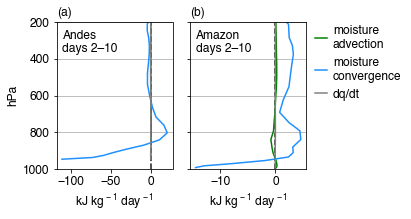

In [86]:
fontsize=12

fig = mp.figure(figsize=(4.5,3))

ax_list = []

#####
ax = fig.add_subplot(121)

ax.plot(diff_wet_region_adv*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_wet_region_conv*86400./1000.,ptot_400_wet_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_wet_region_dmsedt*86400./1000.,ptot_400_wet_region_midpoints/100.,c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(a)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(122)

ax.plot(diff_dry_region_adv*86400./1000.,ptot_400_dry_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_dry_region_conv*86400./1000.,ptot_400_dry_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_dry_region_dmsedt*86400./1000.,ptot_400_dry_region_midpoints/100.,c='0.5',label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax.text(s='Amazon\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(b)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

fig.tight_layout(h_pad=1)

handles, labels = ax_list[1].get_legend_handles_labels()
legend = ax_list[1].legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(1.05,1), edgecolor='None', \
                   facecolor='None', fancybox=False, bbox_transform=ax_list[1].transAxes, loc='upper left', \
                   borderaxespad=0., borderpad=0.25, handlelength=1.0, handletextpad=0.5, \
                   columnspacing=0.5, markerscale=1)

fig.savefig('manuscript_figXX_mean_mse_budget_TOTAL_10d_ONLY.png', dpi=600, \
            transparent=True, bbox_inches='tight')

# Do same for vertical terms

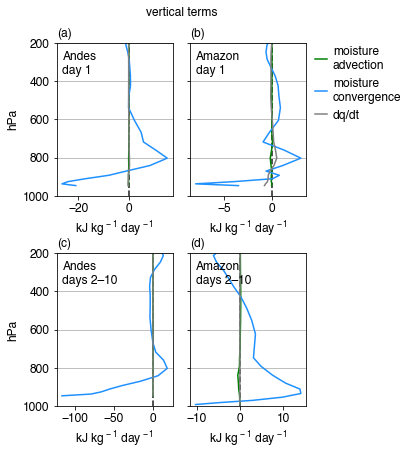

In [87]:
fontsize=12

fig = mp.figure(figsize=(4.5,6))

ax_list = []

#####
ax = fig.add_subplot(221)

ax.plot(diff_wet_region_vert_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moist. adv.')
ax.plot(diff_wet_region_vert_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moist. conv.')
ax.plot(diff_wet_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(a)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(222)

ax.plot(diff_dry_region_vert_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_dry_region_vert_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_dry_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax_list.append(ax)
ax.text(s='Amazon\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(b)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()

#####
ax = fig.add_subplot(223)

ax.plot(diff_wet_region_vert_adv*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_wet_region_vert_conv*86400./1000.,ptot_400_wet_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_wet_region_dmsedt*86400./1000.,ptot_400_wet_region_midpoints/100.,c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(c)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(224)

ax.plot(diff_dry_region_vert_adv*86400./1000.,ptot_400_dry_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_dry_region_vert_conv*86400./1000.,ptot_400_dry_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_dry_region_dmsedt*86400./1000.,ptot_400_dry_region_midpoints/100.,c='0.5',label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax.text(s='Amazon\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(d)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

fig.tight_layout(h_pad=1)

handles, labels = ax_list[1].get_legend_handles_labels()
legend = ax_list[1].legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(1.05,1), edgecolor='None', \
                   facecolor='None', fancybox=False, bbox_transform=ax_list[1].transAxes, loc='upper left', \
                   borderaxespad=0., borderpad=0.25, handlelength=1.0, handletextpad=0.5, \
                   columnspacing=0.5, markerscale=1)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()

fig.text(s='vertical terms', x=0.5*(axpos1.x0+axpos2.x1), y=1.02, transform=fig.transFigure, ha='center', va='bottom', fontsize=fontsize)

fig.savefig('manuscript_figXX_mean_mse_budget_VERTICAL_10d_and_day1.png', dpi=600, \
            transparent=True, bbox_inches='tight')

# horizontal terms

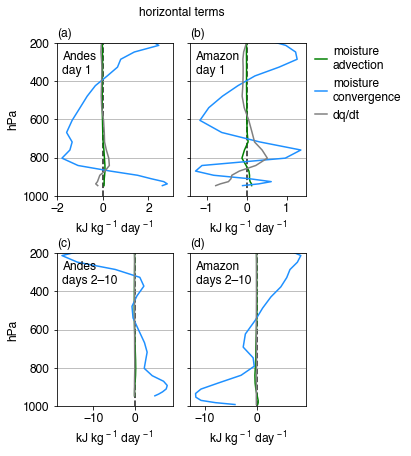

In [123]:
fontsize=12

fig = mp.figure(figsize=(4.5,6))

ax_list = []

#####
ax = fig.add_subplot(221)

ax.plot(diff_wet_region_horiz_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moist. adv.')
ax.plot(diff_wet_region_horiz_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moist. conv.')
ax.plot(diff_wet_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(a)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(222)

ax.plot(diff_dry_region_horiz_adv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_dry_region_horiz_conv_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_dry_region_dmsedt_day1*86400./1000.,ptot_400_wet_region_midpoints/100., c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax_list.append(ax)
ax.text(s='Amazon\nday 1', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(b)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()

#####
ax = fig.add_subplot(223)

ax.plot(diff_wet_region_horiz_adv*86400./1000.,ptot_400_wet_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_wet_region_horiz_conv*86400./1000.,ptot_400_wet_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_wet_region_dmsedt*86400./1000.,ptot_400_wet_region_midpoints/100.,c='0.5', label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-1.5,1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_ylabel('hPa', fontsize=fontsize)
ax.text(s='Andes\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(c)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

#####
ax = fig.add_subplot(224)

ax.plot(diff_dry_region_horiz_adv*86400./1000.,ptot_400_dry_region_midpoints/100., c='green', label='moisture\nadvection')
ax.plot(diff_dry_region_horiz_conv*86400./1000.,ptot_400_dry_region_midpoints/100.,c='dodgerblue', label='moisture\nconvergence')
ax.plot(diff_dry_region_dmsedt*86400./1000.,ptot_400_dry_region_midpoints/100.,c='0.5',label='dq/dt')
ax.axvline(0, ls='--', c='0.1', zorder=1)
ax.set_ylim(1000,200)
#ax.set_xlim(-0.75,0.5)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)
ax.set_yticklabels([])
ax.text(s='Amazon\ndays 2–10', x=0.05, y=0.95, ha='left', va='top', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='(d)', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.yaxis.grid()
ax_list.append(ax)

fig.tight_layout(h_pad=1)

handles, labels = ax_list[1].get_legend_handles_labels()
legend = ax_list[1].legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(1.05,1), edgecolor='None', \
                   facecolor='None', fancybox=False, bbox_transform=ax_list[1].transAxes, loc='upper left', \
                   borderaxespad=0., borderpad=0.25, handlelength=1.0, handletextpad=0.5, \
                   columnspacing=0.5, markerscale=1)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()

fig.text(s='horizontal terms', x=0.5*(axpos1.x0+axpos2.x1), y=1.02, transform=fig.transFigure, ha='center', va='bottom', fontsize=fontsize)

fig.savefig('manuscript_figXX_mean_mse_budget_HORIZONTAL_10d_and_day1.png', dpi=600, \
            transparent=True, bbox_inches='tight')

# lat subsets and latmeans

In [125]:
ptot_400_midpoints_lat_subset = ptot_400_midpoints[:,:,lat_indices_midpoints[:,0],:]
ptot_1000_midpoints_lat_subset = ptot_1000_midpoints[:,:,lat_indices_midpoints[:,0],:]

In [126]:
ptot_400_lat_subset = ptot_400[:,:,lat_indices[:,0],:]
ptot_1000_lat_subset = ptot_1000[:,:,lat_indices[:,0],:]

In [127]:
advection_400_lat_subset = advection_400[:,:,lat_indices_midpoints[:,0],:]
advection_1000_lat_subset = advection_1000[:,:,lat_indices_midpoints[:,0],:]

convergence_400_lat_subset = convergence_400[:,:,lat_indices_midpoints[:,0],:]
convergence_1000_lat_subset = convergence_1000[:,:,lat_indices_midpoints[:,0],:]

In [128]:
cont_adv_latmean = numpy.nanmean(advection_400_lat_subset, axis=2)
phys_adv_latmean = numpy.nanmean(advection_1000_lat_subset, axis=2)

cont_conv_latmean = numpy.nanmean(convergence_400_lat_subset, axis=2)
phys_conv_latmean = numpy.nanmean(convergence_1000_lat_subset, axis=2)

In [129]:
dmsedt_400_lat_subset = dmsedt_400[:,:,lat_indices_midpoints[:,0],:]
dmsedt_1000_lat_subset = dmsedt_1000[:,:,lat_indices_midpoints[:,0],:]

In [132]:
ptot_400_latmean = numpy.nanmean(ptot_400_lat_subset, axis=2)
ptot_1000_latmean = numpy.nanmean(ptot_1000_lat_subset, axis=2)

In [133]:
ptot_400_midpoints_latmean = numpy.nanmean(ptot_400_midpoints_lat_subset, axis=2)
ptot_1000_midpoints_latmean = numpy.nanmean(ptot_1000_midpoints_lat_subset, axis=2)

In [134]:
dmsedt_400_latmean = numpy.nanmean(dmsedt_400_lat_subset, axis=2)
dmsedt_1000_latmean = numpy.nanmean(dmsedt_1000_lat_subset, axis=2)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [135]:
ptot_400_midpoints_lat_subset = ptot_400_midpoints[:,:,lat_indices_midpoints[:,0],:]
ptot_400_midpoints_latmean = numpy.nanmean(ptot_400_midpoints_lat_subset, axis=2)

In [136]:
xx,zz=numpy.meshgrid(xlong[0,:],ptot_400[0,:,:,0].mean(axis=1))

In [137]:
diff_adv_latmean = phys_adv_latmean-cont_adv_latmean
diff_conv_latmean = phys_conv_latmean-cont_conv_latmean
diff_dmsedt_latmean = dmsedt_1000_latmean-dmsedt_400_latmean

In [138]:
wa_diffs_lat_subset = wa_diffs_landmask[:,:,lat_indices[:,0],:]
wa_diffs_latmean = numpy.nanmean(wa_diffs_lat_subset, axis=2)
wa_diffs_time_latmean = numpy.nanmean(wa_diffs_latmean[24:,:,:], axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
ptot_400_time_latmean = numpy.nanmean(ptot_400_latmean, axis=0)

# gridspec version of plot

# Plot dmsedt and moisture convergence in lat means

In [140]:
dmsedt_diff_latmean = dmsedt_1000_latmean - dmsedt_400_latmean

In [141]:
xx_midpoints = 0.5*(xx[1:,1:]+xx[:-1,:-1])

ptot_400_time_latmean_midpoints = 0.5*(ptot_400_time_latmean[1:,1:]+\
                                       ptot_400_time_latmean[:-1,:-1])

# dmsedt and convergence terms on day 1

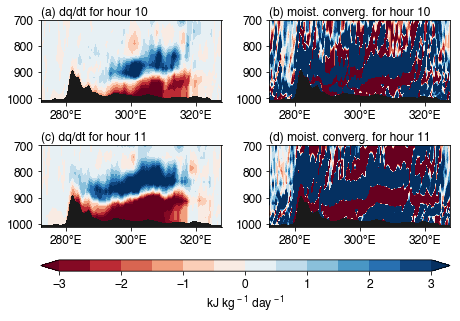

In [143]:
fontsize=12

xlong_min = -154.76123
xlong_max = -25.238678

levels = numpy.arange(-3,3.1,0.5)

fig = mp.figure(figsize=(6.5,3.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []

hour1 = 13
hour1_string = hour1-4+1

hour2 = 14
hour2_string = hour2-4+1

ax = fig.add_subplot(221)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour1,:,:]*86400./1000., cmap='RdBu',\
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(a) dq/dt for hour '+'{:02d}'.format(hour1_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(222)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_conv_latmean[hour1,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(b) moist. converg. for hour '+'{:02d}'.format(hour1_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(223)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(c) dq/dt for hour '+'{:02d}'.format(hour2_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(224)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_conv_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(d) moist. converg. for hour '+'{:02d}'.format(hour2_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

fig.tight_layout(h_pad=2)

axpos_bl = ax_list[2].get_position()
axpos_br = ax_list[3].get_position()

cbar_ax = fig.add_axes([axpos_bl.x0, axpos_bl.y0-0.175, axpos_br.x1-axpos_bl.x0, 0.045])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('kJ kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)

fig.savefig('dmsedt_and_mse_convergence_hours_'+\
            '{:02d}'.format(hour1_string)+\
            'and'+'{:02d}'.format(hour2_string)+'.png',\
            dpi=600, bbox_inches='tight')

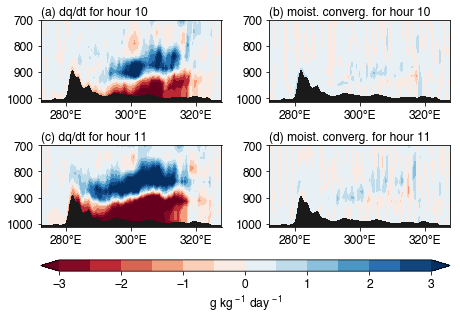

In [144]:
fontsize=12

xlong_min = -154.76123
xlong_max = -25.238678

levels = numpy.arange(-3,3.1,0.5)

fig = mp.figure(figsize=(6.5,3.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []

hour1 = 13
hour1_string = hour1-4+1

hour2 = 14
hour2_string = hour2-4+1

ax = fig.add_subplot(221)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour1,:,:]*86400./1000., cmap='RdBu',\
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(a) dq/dt for hour '+'{:02d}'.format(hour1_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(222)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_adv_latmean[hour1,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(b) moist. converg. for hour '+'{:02d}'.format(hour1_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(223)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(c) dq/dt for hour '+'{:02d}'.format(hour2_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(224)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_adv_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(d) moist. converg. for hour '+'{:02d}'.format(hour2_string), x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

fig.tight_layout(h_pad=2)

axpos_bl = ax_list[2].get_position()
axpos_br = ax_list[3].get_position()

cbar_ax = fig.add_axes([axpos_bl.x0, axpos_bl.y0-0.175, axpos_br.x1-axpos_bl.x0, 0.045])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)

fig.savefig('dmsedt_and_mse_advection_hours_'+\
            '{:02d}'.format(hour1_string)+\
            'and'+'{:02d}'.format(hour2_string)+'.png',\
            dpi=600, bbox_inches='tight')

In [1]:
fontsize=12

xlong_min = -154.76123
xlong_max = -25.238678

levels = numpy.arange(-10,10.1,2)

fig = mp.figure(figsize=(8,3.5))

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []

hour1 = 13
hour1_string = hour1-4+1

hour2 = 14
hour2_string = hour2-4+1

ax = fig.add_subplot(231)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour1,:,:]*86400./1000., cmap='RdBu',\
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(a) dq/dt', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour1_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)

ax = fig.add_subplot(232)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_conv_latmean[hour1,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(b) moisture convergence', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour1_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)



ax = fig.add_subplot(233)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_adv_latmean[hour1,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(c) moisture advection', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour1_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)





ax = fig.add_subplot(234)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           dmsedt_diff_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(d) dq/dt', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour2_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)


ax = fig.add_subplot(235)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_conv_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(e) moisture convergence', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour2_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)


ax = fig.add_subplot(236)
contour_plot = ax.contourf(xx_midpoints+360., \
                           ptot_400_time_latmean_midpoints/100., \
                           diff_adv_latmean[hour2,:,:]*86400./1000., cmap='RdBu', \
                           levels=levels, extend='both')

ax.set_ylim(1013.25,700)
ax.set_xticks([280,300,320])
ax.set_xlim(xlong_min+67.+360.,xlong_max+360.-7)
ax.set_xticklabels(xticks_format)
ax.set_facecolor('0.1')
ax.tick_params(labelsize=fontsize)
ax.set_yticks([700,800,900,1000])
ax.text(s='(f) moisture advection', x=0, y=1.02, \
        ha='left', va='bottom', \
        transform=ax.transAxes, fontsize=fontsize)
ax.text(s='hour '+'{:02d}'.format(hour2_string), x=0.95, y=0.91, \
        ha='right', va='top', \
        transform=ax.transAxes, fontsize=fontsize)
ax_list.append(ax)


fig.tight_layout(h_pad=2)

axpos_bl = ax_list[3].get_position()
axpos_br = ax_list[5].get_position()

cbar_ax = fig.add_axes([axpos_bl.x0, axpos_bl.y0-0.175, axpos_br.x1-axpos_bl.x0, 0.045])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$ day$^{\,-1}$', fontsize=fontsize)

fig.savefig('dmsedt_and_mse_convergence_and_advection_hours_'+\
            '{:02d}'.format(hour1_string)+\
            'and'+'{:02d}'.format(hour2_string)+'.png',\
            dpi=600, bbox_inches='tight')

NameError: name 'numpy' is not defined